In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
data = pd.read_excel('/mnt/camca_NAS/denoising/models/quantitative_results_multiple_scans.xlsx')

In [3]:
# data from one case
index = 0 
row = data.iloc[index]
patient_id = row['patient_id']
patient_subid = row['patient_subid']

metric = 'mae'
y = []
for i in range(1,21):
    y.append(row[metric + '_scan'+str(i)])


[7.60945191 5.72674567 4.92136971 4.46640414 4.16304953 3.85971321
 3.63848474 3.47543878 3.34820067 3.24499219 3.16310804 3.09492129
 3.03679987 2.98603478 2.94199183 2.90285702 2.86861306 2.83935652
 2.81172409 2.78784842]


### for a single case

for power law, the limit of y when x is very large is: 0.9658491686740246


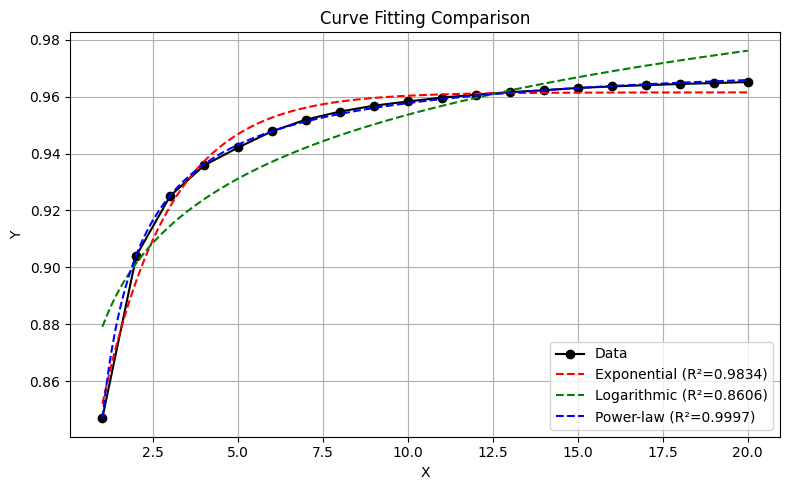

In [19]:
# data from one case
index = 1
row = data.iloc[index]
patient_id = row['patient_id']
patient_subid = row['patient_subid']

metric = 'ssim'
y = []
for i in range(1,21):
    y.append(row[metric + '_scan'+str(i)])

x = np.arange(1, 21)

# Define fitting functions
def log_func(x, a, b):
    return a * np.log(x) + b

def power_func(x, a, b, c):
    return a * x**(-b) + c

def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the curves
popt_log, _ = curve_fit(log_func, x, y)
popt_pow, _ = curve_fit(power_func, x, y, maxfev=10000)
popt_exp, _ = curve_fit(exp_func, x, y, maxfev=10000)

# Generate predictions
x_fit = np.linspace(1, 20, 200)
y_log = log_func(x_fit, *popt_log)
y_pow = power_func(x_fit, *popt_pow)
y_exp = exp_func(x_fit, *popt_exp)

# Calculate R^2
r2_exp = r2_score(y, exp_func(x, *popt_exp))
r2_log = r2_score(y, log_func(x, *popt_log))
r2_pow = r2_score(y, power_func(x, *popt_pow))

# find the limit of y when x is very large
y_limit_pow = power_func(20, *popt_pow)
print('for power law, the limit of y when x is very large is:', y_limit_pow)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'ko-', label='Data')
plt.plot(x_fit, y_exp, 'r--', label=f'Exponential (R²={r2_exp:.4f})')
plt.plot(x_fit, y_log, 'g--', label=f'Logarithmic (R²={r2_log:.4f})')
plt.plot(x_fit, y_pow, 'b--', label=f'Power-law (R²={r2_pow:.4f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curve Fitting Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### for average

for power law, the limit of y when x is very large is: 0.9529509620233103


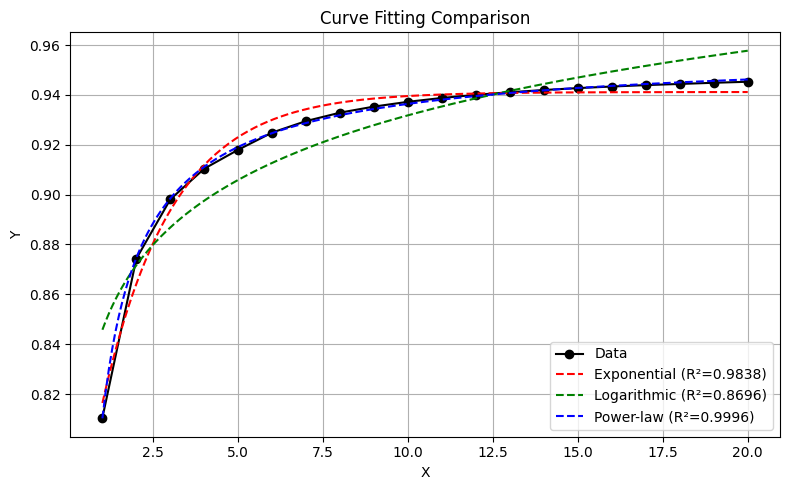

In [24]:
mae_avg_list = []
rmse_avg_list = []
ssim_avg_list = []

for i in range(1,21):
    mae_avg = data['mae_scan'+str(i)].mean()
    mae_avg_list.append(mae_avg)
    rmse_avg = data['rmse_scan'+str(i)].mean()
    rmse_avg_list.append(rmse_avg)
    ssim_avg = data['ssim_scan'+str(i)].mean()
    ssim_avg_list.append(ssim_avg)
        
y = ssim_avg_list

x = np.arange(1, 21)

# Define fitting functions
def log_func(x, a, b):
    return a * np.log(x) + b

def power_func(x, a, b, c):
    return a * x**(-b) + c

def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the curves
popt_log, _ = curve_fit(log_func, x, y)
popt_pow, _ = curve_fit(power_func, x, y, maxfev=10000)
popt_exp, _ = curve_fit(exp_func, x, y, maxfev=10000)

# Generate predictions
x_fit = np.linspace(1, 20, 200)
y_log = log_func(x_fit, *popt_log)
y_pow = power_func(x_fit, *popt_pow)
y_exp = exp_func(x_fit, *popt_exp)

# Calculate R^2
r2_exp = r2_score(y, exp_func(x, *popt_exp))
r2_log = r2_score(y, log_func(x, *popt_log))
r2_pow = r2_score(y, power_func(x, *popt_pow))

# find the limit of y when x is very large
y_limit_pow = power_func(50, *popt_pow)
print('for power law, the limit of y when x is very large is:', y_limit_pow)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'ko-', label='Data')
plt.plot(x_fit, y_exp, 'r--', label=f'Exponential (R²={r2_exp:.4f})')
plt.plot(x_fit, y_log, 'g--', label=f'Logarithmic (R²={r2_log:.4f})')
plt.plot(x_fit, y_pow, 'b--', label=f'Power-law (R²={r2_pow:.4f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curve Fitting Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()